# Tutorial

This tutorial implements the flexible state-switching Hawkes processes (dynamic_SNMHP). It includes both simulation and statistical inference. 

## Vanilla Multivariate Hawkes Processes

An $M$-dimensional multivariate HP consists of $M$ sequences of random timestamps $\{\{t_n^i \}_{n=1}^{N_i}\}_{i=1}^M$ in the observation window $[0,T]$ where $t_n^i$ is the time of $n$-th event on $i$-th dimension, $M$ is the number of dimensions and $N_i$ is the number of events in the $i$-th dimension. A point process can be identified by its counting process $N(t)=\sum_{n}I(t_n<t)$ where $I(\cdot)$ is the indicator function. The conditional intensity $\lambda(t\mid\mathcal{H}_t)$ is defined as $\lambda(t\mid\mathcal{H}_t)dt=p(N(t+dt)-N(t)=1\mid\mathcal{H}_t)$ where $\mathcal{H}_t$ is the historical information before $t$. In the sequel, we use $\lambda^*(t)$ to represent the conditional intensity $\lambda(t\mid\mathcal{H}_t)$ for short. The $i$-th dimensional conditional intensity is designed as

$$\lambda_i^*(t)=\mu_i+\sum_{j=1}^M\sum_{t_n^j<t}\phi_{ij}(t-t_n^j),$$

where $\mu_i$ is the base intensity and $\phi_{ij}(\cdot)$ is the causal influence function from dimension $j$ to dimension $i$. To ease inference, $\phi_{ij}(\cdot)$ is typically assumed to be exponential decay or power law decay. The summation over past events and dimensions leads to the self- and mutual-excitation as the occurrence of past events within and across dimensions increases the future intensity. 

## Flexible State-Switching Hawkes Processes (dynamic_SNMHP)

We propose the dynamic_SNMHP to enrich the vanilla HPs with flexible influence functions, inhibitory effects and time-varying parameters. An $M$-dimensional dynamic_SNMHP consists of $M$ sequences of random timestamps and their corresponding states $D=\{\{\{t_n^i, z(t_n^i)\}_{n=1}^{N_i}\}_{i=1}^M, z(T)\}$ in the observation window $[0,T]$. 

In the dynamic_SNMHP, we introduce a state process $z(t)$ that takes values in a discrete finite state space $\mathcal{Z}=\{1,\ldots,K\}$ to represent the system state. We establish an endogenous Markov state process which is coupled with the point processes to form a closed-loop interaction. Reciprocally, the underlying parameters of point processes depend on the current system state; at the meantime, the state process switches only when an event occurs on point processes by a state-transition matrix depending on the event type. 

Given a set of state-transition matrices $G=\{G_{1},\ldots,G_{M}\}$ with ${G}_{i}$ being a $K\times K$ transition probability matrix for the $i$-th dimension (type), the transition probability of $z(t)$ at event timestamp $t_n^i$ is

$$p(z({t_n^i}^+)=k'\mid z(t_n^i)=k)=g_{i}(k,k'),$$

where we assume the state process $z(t)$ is left continuous $\lim_{t\to c^-}z(t)= z(c)$ and $z({t_n^i}^+)$ is the right limit of $z({t_n^i})$. $g_{i}(k,k')$ with $k,k'\in\{1,\ldots,K\}$ is the entry of $G_{i}$. 

In turn, we define how the point processes depend on the state process. We establish a nonlinear HP variant with the excitation-inhibition-mixture influence functions depending on the system state. The $i$-th dimensional conditional intensity of dynamic_SNMHP is defined as 

$$\lambda_i^*(t,z(t))=\overline{\lambda}_i\sigma(h_i(t,z(t))),\ \ \ h_i(t,z(t))=\mu_i^{z(t)}+\sum_{j=1}^M\sum_{t_n^j<t}\phi_{ij}^{z(t)}(t-t_n^j),$$

where $h_i(t,z(t))$ is a real-valued state-dependent activation passed through a logistic function $\sigma(\cdot)$ to guarantee the non-negativity of intensity and then scaled by an upper-bound $\overline{\lambda}_i$. $\mu_i^{z(t)}$ and $\phi_{ij}^{z(t)}$ are the $z(t)$-state base activation and influence function which can be negative. 

To be flexible, $\phi_{ij}^{z(t)}$ is assumed to be a mixture function $\phi_{ij}^{z(t)}(\cdot)=\sum_{b=1}^B w_{ijb}^{z(t)}\widetilde{\phi}_b(\cdot)$ where $\{\tilde{\phi}_b\}_{b=1}^B$ are predefined basis functions and $w_{ijb}^{z(t)}$ is the state-dependent mixture weight characterizing the influence from $j$-th dimension to $i$-th dimension by $b$-th basis function in the $z(t)$ state. Therefore, the $i$-th dimensional activation can be rewritten in a vector form

$$h_i(t,z(t))=\mu_i^{z(t)}+\sum_{j=1}^M\sum_{b=1}^B w_{ijb}^{z(t)}\Phi_{jb}(t)={\mathbf{w}_{i}^{z(t)}}^\top\cdot\mathbf{\Phi}(t),$$

where $\Phi_{jb}(t)=\sum_{t_n^j<t}\widetilde{\phi}_{b}(t-t_n^j)$ is $j$-th dimensional cumulative influence on $t$ by $b$-th basis function and can be precomputed; $\mathbf{w}_{i}^{z(t)}=[\mu_i^{z(t)}, w_{i11}^{z(t)},\dotsc, w_{iMB}^{z(t)}]^\top$ and $\mathbf{\Phi}(t)=[1, \Phi_{11}(t), \dotsc, \Phi_{MB}(t)]^\top$. The basis functions are assumed to be the scaled shifted Beta densities on the support $[0,T_{\phi}]$ as the inference will be free from edge effects. 

Combining the state process and point processes, we obtain the dynamic_SNMHP. Dynamic_SNMHP successfully addresses three limitations, as its influence functions are flexible, its influence effect can be inhibitive and its underlying parameters are time-varying. The parameters of dynamic_SNMHP comprise (1) the dimension-dependent state-transition matrices, (2) the intensity upper-bounds and (3) the state-dependent activation weights, which we write as ${\theta}=\{\{G_i\}_{i=1}^M,\{\overline{\lambda}_i\}_{i=1}^M,\{\mathbf{w}_{i}^k\}_{i,k=1}^{M,K}\}$. 

In the paper, we present efficient Gibbs sampler, EM algorithm and mean-field approximation for Bayesian inference on dynamic_SNMHP, by using latent variable augmentation techniques. Please refer to the paper for more details. 

### Simulation

From the `fs_hawkes_beta` module, we import the `FSHawkesBeta` class. We set the number of states (Z), dimensions (D) and basis functions (B). We initialise an instance of dynamic_SNMHP with 2 dimensions, 2 states and 4 basis functions.

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns # for plot
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False}) # set seaborn style
import matplotlib.pyplot as plt # for plot
from importlib import reload
import fs_hawkes_beta
fs_hawkes_beta = reload(fs_hawkes_beta)
from fs_hawkes_beta import FSHawkesBeta
from scipy.stats import beta
from scipy.stats import multivariate_normal
from scipy.stats import gamma
from scipy.stats import dirichlet
import pickle as pickle

In [96]:
number_of_states=2
number_of_dimensions=2
number_of_basis=4
toy_model = FSHawkesBeta(number_of_states,number_of_dimensions,number_of_basis)

**We use D, Z and B in brackets to indicate the dimension of parameter.**
We input the parameters: the intensity upperbound $\bar{\lambda}=[5,5]$ (D); the base activation at two states $\mu=[[0,0],[0,0]]$ (Z,D); the parameters of basis functions (beta densities) $\text{Beta}(a=50,b=50,\text{shift}=\{-2,-1,0,1\})$ (B,3); the influence weight at two states $W=[[[[1,0,0,0],[0,-0.5,0,0]],[[0,0,0,-0.5],[0,0,1,0]]],[[[-0.5,0,0,0],[0,1,0,0]],[[0,0,0,1],[0,0,-0.5,0]]]]$ (Z,D,D,B); the support of basis functions (the scale of beta densities) $T_\phi=6$; the state transition matrixes $P=[[[0.99,0.01],[0.01,0.99]],[[0.80,0.20],[0.20,0.80]]]$ (D,Z,Z). 

In [97]:
beta_ab=np.array([[50,50,-2],[50,50,-1],[50,50,0],[50,50,1]])
lamda_ub=np.array([5.,5.])
base_activation=np.array([[0.,0.],[0.,0.]])
weight=np.array([[[[1.,0.,0.,0.],[0.,-0.5,0.,0.]],[[0.,0.,0.,-0.5],[0.,0.,1.,0.]]],\
                 [[[-0.5,0.,0.,0.],[0.,1.,0.,0.]],[[0.,0.,0.,1.],[0.,0.,-0.5,0.]]]])
T_phi=6.
P=np.array([[[0.99,0.01],[0.01,0.99]],[[0.80,0.20],[0.20,0.80]]])
T=500.
T_test=500.

In [98]:
toy_model.set_hawkes_hyperparameters(beta_ab, T_phi)
toy_model.set_hawkes_parameters(lamda_ub, base_activation, weight, P)

We simulate two sets of data as the training/test data. Both the training and test datasets are on $[0,T]$. `points_hawkes` and `points_hawkes_test` are the timestamps on each dimension for training and test data; `states` (`states_test`)is the state sequence on $[0,T]$; `states_n`(`states_n_test`) is the states of timestamps on each dimension. You can simulate the synthetic data or load our synthetic data directly.

In [99]:
# # simulation: It runs about 5 mins on my laptop. 
# points_hawkes,states,states_n = toy_model.simulation(T, P_0=[0.5,0.5]) # P_0 is the distribution of state at t=0
# points_hawkes_test,states_test,states_n_test = toy_model.simulation(T_test, P_0=[0.5,0.5])

In [100]:
# load our synthetic data
df=pd.read_csv('./synthetic_data.csv',index_col=0)
points_hawkes=[]
for i in range(2):
    points_hawkes.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)]))

df=pd.read_csv('./synthetic_data_states_n.csv',index_col=0)
states_n=[]
for i in range(2):
    states_n.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)].astype(int)))

df=pd.read_csv('./synthetic_data_states.csv',index_col=0)
states=list(df['0'])

df=pd.read_csv('./synthetic_data_test.csv',index_col=0)
points_hawkes_test=[]
for i in range(2):
    points_hawkes_test.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)]))

df=pd.read_csv('./synthetic_data_states_n_test.csv',index_col=0)
states_n_test=[]
for i in range(2):
    states_n_test.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)].astype(int)))

df=pd.read_csv('./synthetic_data_states_test.csv',index_col=0)
states_test=list(df['0'])

Let us visualize the simulated data. 

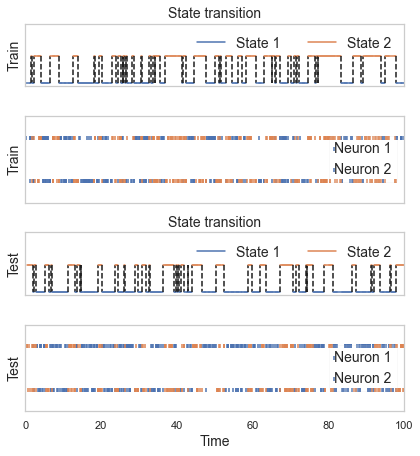

In [101]:
f, axes = plt.subplots(4, 1,figsize=(6,6.5),sharex=True, gridspec_kw={'height_ratios': [1.8,2.5,1.8,2.5]})
sns.set(style="white")
colors=sns.color_palette()
points_hawkes_sum=np.sort(sum(points_hawkes,[]))
for i in range(len(points_hawkes_sum)-1):
    if states[i]==states[i+1]:
        axes[0].plot([points_hawkes_sum[i],points_hawkes_sum[i+1]],[states[i],states[i+1]],c=colors[states[i]])
    else:
        axes[0].plot([points_hawkes_sum[i],points_hawkes_sum[i]],[states[i],states[i+1]],'k--')
        axes[0].plot([points_hawkes_sum[i],points_hawkes_sum[i+1]],[states[i+1],states[i+1]],c=colors[states[i+1]])
axes[0].plot([0,0],[0,0],c=colors[0],label='State 1')
axes[0].plot([0,0],[0,0],c=colors[1],label='State 2')
axes[0].legend(loc='upper right',fontsize=14,ncol=2,frameon=False)
axes[0].set_yticks([])
axes[0].set_ylabel('Train',fontsize=14)
axes[0].set_title('State transition',fontsize=14)
axes[0].set_xlim(0,100)
axes[0].set_ylim(-0.1,2.2)

i_points=np.array(points_hawkes[0])[np.where(np.array(states_n[0])==0)]
axes[1].scatter(i_points,[1]*len(i_points),s=10,c=[colors[0]],marker='|',label='Neuron 1')
i_points=np.array(points_hawkes[1])[np.where(np.array(states_n[1])==0)]
axes[1].scatter(i_points,[0]*len(i_points),s=10,c=[colors[0]],marker='|',label='Neuron 2')

i_points=np.array(points_hawkes[0])[np.where(np.array(states_n[0])==1)]
axes[1].scatter(i_points,[1]*len(i_points),s=10,c=[colors[1]],marker='|')
i_points=np.array(points_hawkes[1])[np.where(np.array(states_n[1])==1)]
axes[1].scatter(i_points,[0]*len(i_points),s=10,c=[colors[1]],marker='|')

axes[1].set_xlim(0,100)
axes[1].set_ylim(-0.5,1.5)
axes[1].set_yticks([])
axes[1].set_ylabel('Train',fontsize=14)
axes[1].legend(fontsize=14,framealpha=0.1,loc='right',handlelength=0, handletextpad=0)
axes[1].ticklabel_format(style='plain', axis='x', scilimits=(0,0))

points_hawkes_test_sum=np.sort(sum(points_hawkes_test,[]))
for i in range(len(points_hawkes_test_sum)-1):
    if states_test[i]==states_test[i+1]:
        axes[2].plot([points_hawkes_test_sum[i],points_hawkes_test_sum[i+1]],[states_test[i],states_test[i+1]],\
                     c=colors[states_test[i]])
    else:
        axes[2].plot([points_hawkes_test_sum[i],points_hawkes_test_sum[i]],[states_test[i],states_test[i+1]],'k--')
        axes[2].plot([points_hawkes_test_sum[i],points_hawkes_test_sum[i+1]],[states_test[i+1],states_test[i+1]],\
                     c=colors[states_test[i+1]])
axes[2].plot([0,0],[0,0],c=colors[0],label='State 1')
axes[2].plot([0,0],[0,0],c=colors[1],label='State 2')
axes[2].legend(loc='upper right',fontsize=14,ncol=2,frameon=False)
axes[2].set_yticks([])
axes[2].set_ylabel('Test',fontsize=14)
axes[2].set_title('State transition',fontsize=14)
axes[2].set_xlim(0,100)
axes[2].set_ylim(-0.1,2.2)

i_points=np.array(points_hawkes_test[0])[np.where(np.array(states_n_test[0])==0)]
axes[3].scatter(i_points,[1]*len(i_points),s=10,c=[colors[0]],marker='|',label='Neuron 1')
i_points=np.array(points_hawkes_test[1])[np.where(np.array(states_n_test[1])==0)]
axes[3].scatter(i_points,[0]*len(i_points),s=10,c=[colors[0]],marker='|',label='Neuron 2')

i_points=np.array(points_hawkes_test[0])[np.where(np.array(states_n_test[0])==1)]
axes[3].scatter(i_points,[1]*len(i_points),s=10,c=[colors[1]],marker='|')
i_points=np.array(points_hawkes_test[1])[np.where(np.array(states_n_test[1])==1)]
axes[3].scatter(i_points,[0]*len(i_points),s=10,c=[colors[1]],marker='|')

axes[3].set_xlim(0,100)
axes[3].set_ylim(-0.5,1.5)
axes[3].set_yticks([])
axes[3].set_ylabel('Test',fontsize=14)
axes[3].set_xlabel('Time',fontsize=14)
axes[3].legend(fontsize=14,framealpha=0.1,loc='right',handlelength=0, handletextpad=0)
axes[3].ticklabel_format(style='plain', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

### Inference: Gibbs Sampler

We use the Gibbs sampler to perform inference. The input arguments are training data: `points_hawkes`,`states`,`states_n`; test data: `points_hawkes_test`,`states_test`,`states_n_test`; the end time of training data: `T` and test data: `T_test`; the 'variance' of the Laplace prior: `b`; the hyperparameter of the dirichlet prior: `eta`; the number of grids `num_grid` on \[0,T\] and `num_grid_test` on \[0,T_test\], the number of Gibbs loops: `num_iter`. It runs about 2 hours 30 mins on my laptop.

In [102]:
%%time
lamda_ub_estimated_list_gibbs,W_estimated_list_gibbs,P_estimated_list_gibbs,logl_list_gibbs,logl_test_list_gibbs\
=toy_model.Gibbs_inference(points_hawkes,states,states_n,points_hawkes_test,states_test,states_n_test,\
                 T,T_test,b=0.5,eta=1.0,num_grid=5000,num_grid_test=5000,num_iter=600)

100%|███████████████████████████████████████| 600/600 [2:41:54<00:00, 16.19s/it]

CPU times: user 2h 55min 21s, sys: 5min 53s, total: 3h 1min 14s
Wall time: 2h 43min 24s


The output `lamda_ub_estimated_list_gibbs` is the samples of intensity upperbounds, `W_estimated_list_gibbs[:,:,0]` is the samples of base activation, `W_estimated_list_gibbs[:,:,1:]` is the samples of influence weight, `P_estimated_list_gibbs` is the samples of state transition matrixes,`logl_list_gibbs` and `logl_test_list_gibbs` are the training and test log-likelihood along Gibbs loops. 

We evaluate the mean of parameters by the last 100 samples. 

In [103]:
lamda_ub_estimated_mean_gibbs=np.mean(lamda_ub_estimated_list_gibbs[-100:],axis=0)
W_estimated_mean_gibbs=np.mean(W_estimated_list_gibbs[-100:],axis=0)
P_estimated_mean_gibbs=np.mean(P_estimated_list_gibbs[-100:],axis=0)

Now let us visualize the estimated influence functions $\hat{\phi}_{ij}^{z}$ where $i$ is the target dimension, $j$ is the source dimension and $z$ is the state. 

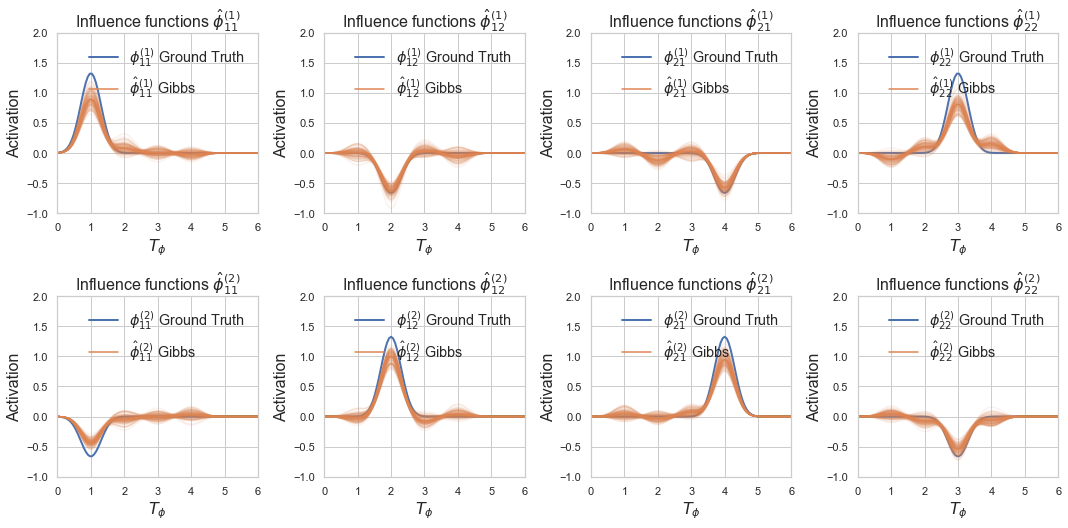

In [104]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),_,gt=True),linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            for k in range(100):
                axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_list_gibbs[-1-k]),color=sns.color_palette()[1],alpha=0.1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_mean_gibbs),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ Gibbs'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,6)
            plt.ylim(-1,2)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

### Inference: EM Algorithm

We perform inference using EM algorithm. The input arguments are training data: `points_hawkes`,`states`,`states_n`; test data: `points_hawkes_test`,`states_test`,`states_n_test`; the end time of training data: `T` and test data: `T_test`; the 'variance' of the Laplace prior: `b`; the number of Gaussian quadrature nodes: `num_gq` on \[0,T\] and `num_gq_test` on \[0,T_test\], the number of EM iterations: `num_iter`. It runs about 4 mins 20 secs on my laptop. 

In [105]:
%%time
lamda_ub_estimated_em,W_estimated_em,P_estimated_em,logl_list_em,logl_test_list_em\
=toy_model.EM_inference(points_hawkes,states,states_n,points_hawkes_test,states_test,states_n_test,\
                     T,T_test,b=0.2,num_gq=5000,num_gq_test=5000,num_iter=600)

100%|█████████████████████████████████████████| 600/600 [02:32<00:00,  3.94it/s]

CPU times: user 4min 1s, sys: 3.95 s, total: 4min 5s
Wall time: 4min 2s


The output `lamda_ub_estimated_em` is the estimated intensity upperbounds, `W_estimated_em[:,0]` is the estimated base activation at different states, `W_estimated_em[:,1:]` is the estimated influence weight at different states, `P_estimated_em` is the estimated state-transition matrices on different dimensions, `logl_list_em` and `logl_test_list_em` are the training and test log-likelihood along EM iterations.

Let us visualize the estimated influence functions $\hat{\phi}_{ij}^{z}$ where $i$ is the target dimension, $j$ is the source dimension and $z$ is the state. 

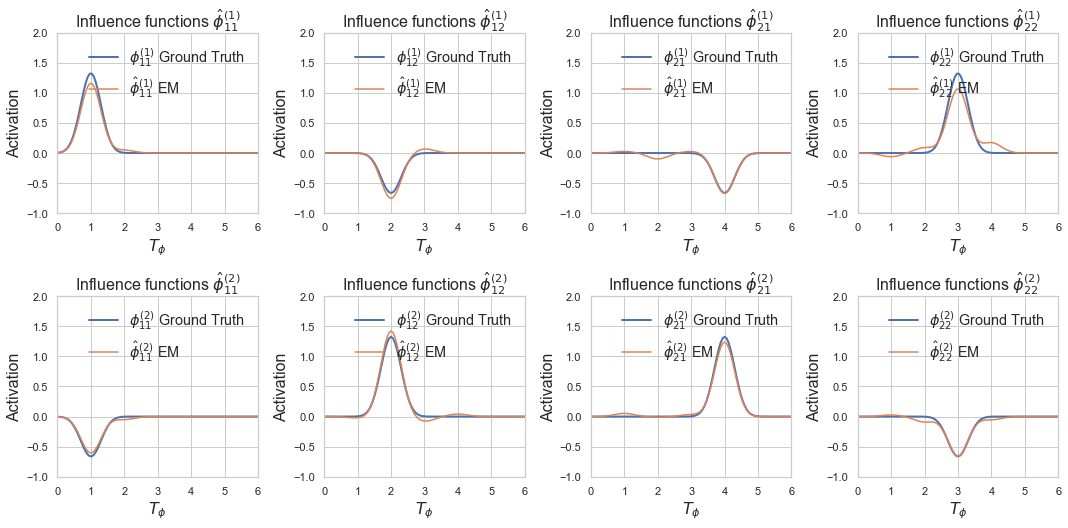

In [106]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),_,gt=True),linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_em),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ EM'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,6)
            plt.ylim(-1,2)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

### Inference: Mean-Field Variational Inference

We perform inference using mean-field approximation. The input arguments are training data: `points_hawkes`,`states`,`states_n`; test data: `points_hawkes_test`,`states_test`,`states_n_test`; the end time of training data: `T` and test data: `T_test`; the 'variance' of the Laplace prior: `b`; the hyperparameter of the dirichlet prior: `eta`; the number of Gaussian quadrature nodes `num_gq` on `[0,T]` and `num_gq_test` on `[0,T_test]`, the number of mean-field iterations: `num_iter`. 

In [107]:
%%time
alpha_estimated_mf,mean_W_estimated_mf,cov_W_estimated_mf,dir_alpha_estimated_mf,logl_list_mf,logl_test_list_mf\
=toy_model.MF_inference(points_hawkes,states,states_n,points_hawkes_test,states_test,states_n_test,\
                     T,T_test,b=0.2,eta=1.0,num_gq=5000,num_gq_test=5000,num_iter=600)

100%|█████████████████████████████████████████| 600/600 [03:34<00:00,  2.80it/s]

CPU times: user 5min 3s, sys: 1.01 s, total: 5min 4s
Wall time: 5min 4s


The output `alpha_estimated_mf` is the location parameter of posterior (Gamma) of intensity upperbounds, `mean_W_estimated_mf` and `cov_W_estimated_mf` are the mean and covariance of posterior (Gaussian) of influence weight, `dir_alpha_estimated_mf` is the parameter of posterior (Dirichlet) of state transition matrixes, `logl_list_mf` and `logl_test_list_mf` are the training and test log-likelihood (evaluated by the mean) along mean-field iterations. 

We draw 100 samples from the posterior of these parameters for the following plot. 

In [108]:
W_estimated_list_mf=np.zeros((100,number_of_states,number_of_dimensions,number_of_dimensions*number_of_basis+1))
for i in range(100):
    for z in range(number_of_states):
        for d in range(number_of_dimensions):
            W_estimated_list_mf[i][z][d]=multivariate_normal(mean_W_estimated_mf[z][d],cov_W_estimated_mf[z][d]).rvs()
lamda_ub_estimated_list_mf=np.zeros((100,number_of_dimensions))
for i in range(100):
    lamda_ub_estimated_list_mf[i]=gamma(a=alpha_estimated_mf,scale=1/T).rvs()
P_estimated_list_mf=np.zeros((100,number_of_dimensions,number_of_states,number_of_states))
for i in range(100):
    for j in range(number_of_dimensions):
        for k in range(number_of_states):
            P_estimated_list_mf[i][j][k]=dirichlet(dir_alpha_estimated_mf[j][k]).rvs()

Let us visualize the estimated influence functions $\hat{\phi}_{ij}^{z}$ where $i$ is the target dimension, $j$ is the source dimension and $z$ is the state. 

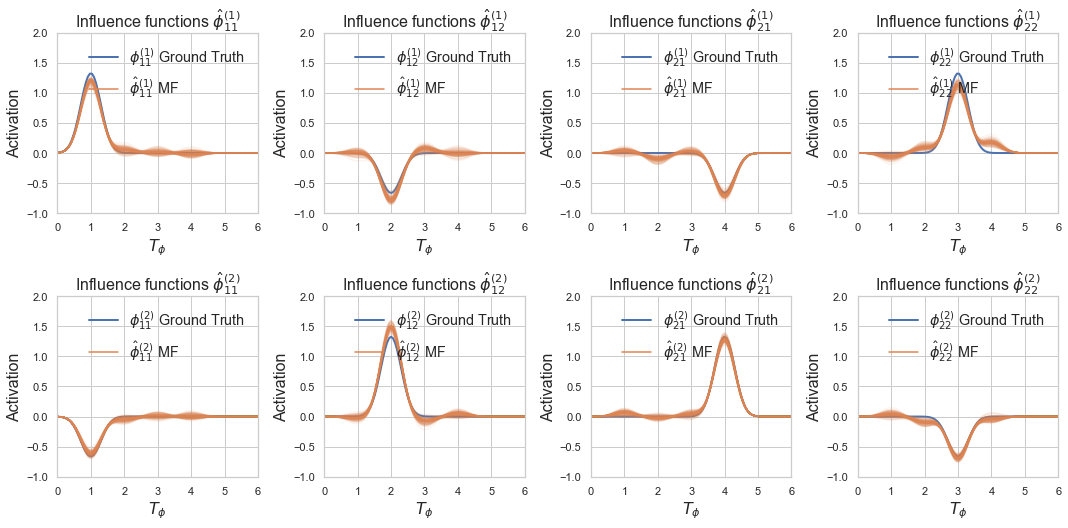

In [109]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),_,gt=True),linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            for k in range(100):
                axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_list_mf[k]),color=sns.color_palette()[1],alpha=0.09)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),mean_W_estimated_mf),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ MF'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,6)
            plt.ylim(-1,2)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

Let us visualize the log-likelihood curves along iterations of Gibbs, EM and Mean-Field. 

In [110]:
training_gibbs=pd.DataFrame(np.array([np.arange(0,len(logl_list_gibbs)),logl_list_gibbs]).T,columns=['Iterations','Log-likelihood'])
training_gibbs['Dataset']='Training'
test_gibbs=pd.DataFrame(np.array([np.arange(0,len(logl_test_list_gibbs)),logl_test_list_gibbs]).T,columns=['Iterations','Log-likelihood'])
test_gibbs['Dataset']='Test'
loglikelihood_gibbs=pd.concat([training_gibbs,test_gibbs])
loglikelihood_gibbs['Algorithm']='Gibbs'

training_em=pd.DataFrame(np.array([np.arange(0,len(logl_list_em)),logl_list_em]).T,columns=['Iterations','Log-likelihood'])
training_em['Dataset']='Training'
test_em=pd.DataFrame(np.array([np.arange(0,len(logl_test_list_em)),logl_test_list_em]).T,columns=['Iterations','Log-likelihood'])
test_em['Dataset']='Test'
loglikelihood_em=pd.concat([training_em,test_em])
loglikelihood_em['Algorithm']='EM'

training_mf=pd.DataFrame(np.array([np.arange(0,len(logl_list_mf)),logl_list_mf]).T,columns=['Iterations','Log-likelihood'])
training_mf['Dataset']='Training'
test_mf=pd.DataFrame(np.array([np.arange(0,len(logl_test_list_mf)),logl_test_list_mf]).T,columns=['Iterations','Log-likelihood'])
test_mf['Dataset']='Test'
loglikelihood_mf=pd.concat([training_mf,test_mf])
loglikelihood_mf['Algorithm']='MF'

loglikelihood_curve=pd.concat([loglikelihood_gibbs,loglikelihood_mf,loglikelihood_em],ignore_index=True)

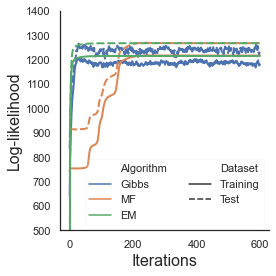

In [122]:
f, axes = plt.subplots(1, 1,figsize=(4,4))
sns.set(style='white')
sns.despine()
sns.lineplot(x="Iterations", y="Log-likelihood",hue="Algorithm",style='Dataset',\
             dashes=True,linewidth = 2, data=loglikelihood_curve,ax=axes)
axes.legend(fontsize=11,framealpha=0.1,ncol=2,loc='best')
axes.set_xlabel("Iterations",fontsize=16)
axes.set_ylabel("Log-likelihood",fontsize=16)
axes.set_ylim(500,1400)
plt.tight_layout()
plt.show()

Let us visualize the heat map of functional connectivity between two neurons in two states with red indicating excitation and blue indicating inhibition. 

In [112]:
phi_heat_gt=np.array([[[1,-0.5],[-0.5,1]],[[-0.5,1],[1,-0.5]]])
phi_heat_gibbs=np.zeros((number_of_states,number_of_dimensions,number_of_dimensions))
for z in range(number_of_states):    
    for i in range(number_of_dimensions):
        phi_heat_gibbs[z,:,i]=np.sum(W_estimated_mean_gibbs[z,:,1:][:,number_of_basis*i:number_of_basis*(i+1)],axis=1)
phi_heat_em=np.zeros((number_of_states,number_of_dimensions,number_of_dimensions))
for z in range(number_of_states):    
    for i in range(number_of_dimensions):
        phi_heat_em[z,:,i]=np.sum(W_estimated_em[z,:,1:][:,number_of_basis*i:number_of_basis*(i+1)],axis=1)
phi_heat_mf=np.zeros((number_of_states,number_of_dimensions,number_of_dimensions))
for z in range(number_of_states):    
    for i in range(number_of_dimensions):
        phi_heat_mf[z,:,i]=np.sum(mean_W_estimated_mf[z,:,1:][:,number_of_basis*i:number_of_basis*(i+1)],axis=1)

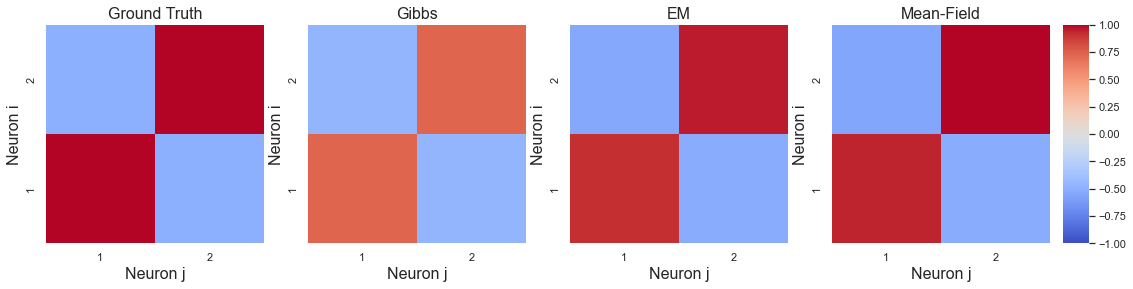

In [113]:
# State 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18,7.5))
cbar_ax = fig.add_axes([.91, 0.3, .02, .405])
sns.heatmap(phi_heat_gt[0],ax=ax1,center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
sns.heatmap(phi_heat_gibbs[0],ax=ax2, center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
sns.heatmap(phi_heat_em[0],ax=ax3, center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
sns.heatmap(phi_heat_mf[0],ax=ax4, center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
ax1.set(xticklabels=[1,2],yticklabels=[1,2])
ax2.set(xticklabels=[1,2],yticklabels=[1,2])
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()
ax1.set_xlabel('Neuron j',fontsize=16)
ax1.set_ylabel('Neuron i',fontsize=16)
ax2.set_xlabel('Neuron j',fontsize=16)
ax2.set_ylabel('Neuron i',fontsize=16)
ax3.set_xlabel('Neuron j',fontsize=16)
ax3.set_ylabel('Neuron i',fontsize=16)
ax4.set_xlabel('Neuron j',fontsize=16)
ax4.set_ylabel('Neuron i',fontsize=16)
ax1.set_title('Ground Truth',fontsize=16)
ax2.set_title('Gibbs', fontsize=16)
ax3.set_title('EM',fontsize=16)
ax4.set_title('Mean-Field', fontsize=16)
plt.show()

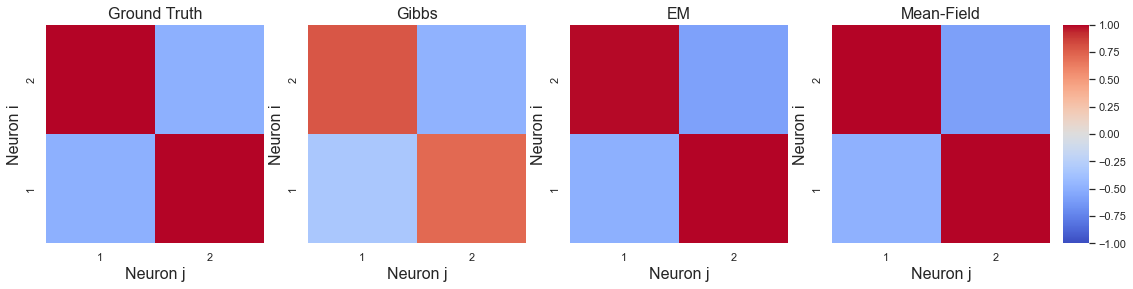

In [114]:
# State 2
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18,7.5))
cbar_ax = fig.add_axes([.91, 0.3, .02, .405])
sns.heatmap(phi_heat_gt[1],ax=ax1,center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
sns.heatmap(phi_heat_gibbs[1],ax=ax2, center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
sns.heatmap(phi_heat_em[1],ax=ax3, center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
sns.heatmap(phi_heat_mf[1],ax=ax4, center=0,vmin=-1,vmax=1,square=True,xticklabels=[1,2],yticklabels=[1,2],cmap='coolwarm',cbar_ax=cbar_ax)
ax1.set(xticklabels=[1,2],yticklabels=[1,2])
ax2.set(xticklabels=[1,2],yticklabels=[1,2])
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()
ax1.set_xlabel('Neuron j',fontsize=16)
ax1.set_ylabel('Neuron i',fontsize=16)
ax2.set_xlabel('Neuron j',fontsize=16)
ax2.set_ylabel('Neuron i',fontsize=16)
ax3.set_xlabel('Neuron j',fontsize=16)
ax3.set_ylabel('Neuron i',fontsize=16)
ax4.set_xlabel('Neuron j',fontsize=16)
ax4.set_ylabel('Neuron i',fontsize=16)
ax1.set_title('Ground Truth',fontsize=16)
ax2.set_title('Gibbs', fontsize=16)
ax3.set_title('EM',fontsize=16)
ax4.set_title('Mean-Field', fontsize=16)
plt.show()

Let us visualize 100 posterior samples and MAP estimate of intensity upper bounds and base activations at two different states from three inference algorithms. 

In [115]:
lamda_1_2_gibbs=pd.DataFrame(np.array(lamda_ub_estimated_list_gibbs)[-100:],columns=['$\hat{\overline{\lambda}}_1$','$\hat{\overline{\lambda}}_2$'])
lamda_1_2_gibbs['Algorithm']='Gibbs'
lamda_1_2_mf=pd.DataFrame(lamda_ub_estimated_list_mf,columns=['$\hat{\overline{\lambda}}_1$','$\hat{\overline{\lambda}}_2$'])
lamda_1_2_mf['Algorithm']='Mean-Field'
lamda_1_2=pd.concat([lamda_1_2_gibbs,lamda_1_2_mf],ignore_index=True)

In [116]:
mu_1_2_gibbs_s1=pd.DataFrame(np.array(W_estimated_list_gibbs)[-100:,0,:,0],columns=['$\hat{\mu}_1^{(1)}$','$\hat{\mu}_2^{(1)}$'])
mu_1_2_gibbs_s1['Algorithm']='Gibbs'
mu_1_2_mf_s1=pd.DataFrame(W_estimated_list_mf[:,0,:,0],columns=['$\hat{\mu}_1^{(1)}$','$\hat{\mu}_2^{(1)}$'])
mu_1_2_mf_s1['Algorithm']='Mean-Field'
mu_1_2_s1=pd.concat([mu_1_2_gibbs_s1,mu_1_2_mf_s1],ignore_index=True)

In [117]:
mu_1_2_gibbs_s2=pd.DataFrame(np.array(W_estimated_list_gibbs)[-100:,1,:,0],columns=['$\hat{\mu}_1^{(2)}$','$\hat{\mu}_2^{(2)}$'])
mu_1_2_gibbs_s2['Algorithm']='Gibbs'
mu_1_2_mf_s2=pd.DataFrame(W_estimated_list_mf[:,1,:,0],columns=['$\hat{\mu}_1^{(2)}$','$\hat{\mu}_2^{(2)}$'])
mu_1_2_mf_s2['Algorithm']='Mean-Field'
mu_1_2_s2=pd.concat([mu_1_2_gibbs_s2,mu_1_2_mf_s2],ignore_index=True)

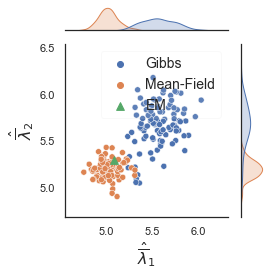

In [118]:
sns.set(style='white')
figure=sns.jointplot(data=lamda_1_2, x='$\hat{\overline{\lambda}}_1$', y='$\hat{\overline{\lambda}}_2$',\
                     hue='Algorithm',height=4)
figure.ax_joint.scatter(lamda_ub_estimated_em[0],lamda_ub_estimated_em[1],marker='^',s=60,\
                        c=[sns.color_palette()[2]],label='EM')
figure.ax_joint.legend(fontsize=14,framealpha=0.1,loc='upper right')
figure.ax_joint.set_xlabel('$\hat{\overline{\lambda}}_1$',fontsize=16)
figure.ax_joint.set_ylabel('$\hat{\overline{\lambda}}_2$',fontsize=16)
plt.tight_layout()
plt.show()

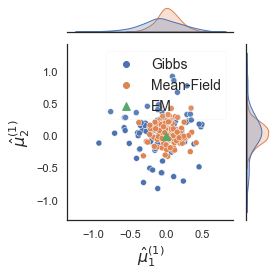

In [119]:
sns.set(style='white')
figure=sns.jointplot(data=mu_1_2_s1, x='$\hat{\mu}_1^{(1)}$', y='$\hat{\mu}_2^{(1)}$',hue='Algorithm',height=4)
figure.ax_joint.scatter(W_estimated_em[0][0][0],W_estimated_em[0][1][0],marker='^',s=60,\
                        c=[sns.color_palette()[2]],label='EM')
figure.ax_joint.legend(fontsize=14,framealpha=0.1,loc='upper right')
figure.ax_joint.set_xlabel('$\hat{\mu}_1^{(1)}$',fontsize=16)
figure.ax_joint.set_ylabel('$\hat{\mu}_2^{(1)}$',fontsize=16)
plt.tight_layout()
plt.show()

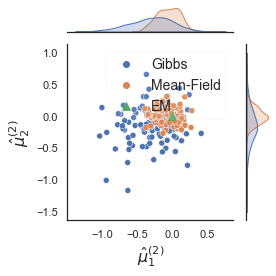

In [120]:
sns.set(style='white')
figure=sns.jointplot(data=mu_1_2_s2, x='$\hat{\mu}_1^{(2)}$', y='$\hat{\mu}_2^{(2)}$',hue='Algorithm',height=4)
figure.ax_joint.scatter(W_estimated_em[1][0][0],W_estimated_em[1][1][0],marker='^',s=60,\
                        c=[sns.color_palette()[2]],label='EM')
figure.ax_joint.legend(fontsize=14,framealpha=0.1,loc='upper right')
figure.ax_joint.set_xlabel('$\hat{\mu}_1^{(2)}$',fontsize=16)
figure.ax_joint.set_ylabel('$\hat{\mu}_2^{(2)}$',fontsize=16)
plt.tight_layout()
plt.show()

### Influence Function Recovery: sinsoidal kernel

We use some predefined influence functions to generate the data directly and check if our model (mixture of Beta densities) can recover them. 

Due to the inefficiency of Gibbs, the inference is performed by only EM algorithm and mean-field approximation. We still analyze the simulated data from the 2-neuron 2-state neural population model. We define two kinds of parameterized influence functions with support $T_{\phi}=2\pi$, (1) sine function: $\phi_{11}^{(1)}(\cdot)=\sin(\cdot)$, $\phi_{12}^{(1)}(\cdot)=-\frac{1}{2}\sin(\cdot)$, $\phi_{21}^{(1)}(\cdot)=-\frac{1}{2}\sin(\cdot)$, $\phi_{22}^{(1)}(\cdot)=\sin(\cdot)$ in the first state and $\phi_{11}^{(2)}(\cdot)=-\frac{1}{2}\sin(\cdot)$, $\phi_{12}^{(2)}(\cdot)=\sin(\cdot)$, $\phi_{21}^{(2)}(\cdot)=\sin(\cdot)$, $\phi_{22}^{(2)}(\cdot)=-\frac{1}{2}\sin(\cdot)$ in the second state; (2) exponential decay sine function: $\phi_{11}^{(1)}(\cdot)=e^{-\frac{1}{2}t}(\sin(2t)+1)$, $\phi_{12}^{(1)}(\cdot)=-\frac{1}{2}e^{-\frac{1}{2}t}(\sin(2t)+1)$, $\phi_{21}^{(1)}(\cdot)=-\frac{1}{2}e^{-\frac{1}{2}t}(\sin(2t)+1)$, $\phi_{22}^{(1)}(\cdot)=e^{-\frac{1}{2}t}(\sin(2t)+1)$ in the first state and $\phi_{11}^{(2)}(\cdot)=-\frac{1}{2}e^{-\frac{1}{2}t}(\sin(2t)+1)$, $\phi_{12}^{(2)}(\cdot)=e^{-\frac{1}{2}t}(\sin(2t)+1)$, $\phi_{21}^{(2)}(\cdot)=e^{-\frac{1}{2}t}(\sin(2t)+1)$, $\phi_{22}^{(2)}(\cdot)=-\frac{1}{2}e^{-\frac{1}{2}t}(\sin(2t)+1)$ in the second state. The state-dependent base activations, the intensity upper bounds and the dimension-dependent state-transition matrices all follow above. We use the thinning algorithm to generate the synthetic spike data on $[0,T=1000]$. 

You can load our synthetic data directly.

In [70]:
# In this section, we only visualize the learned influence function and the ground truth, and do not use test data. 
with open('./2D_data_sin_kernel.pickle', 'rb') as handle:
    points_hawkes,states,states_n = pickle.load(handle)

In [71]:
number_of_states=2
number_of_dimensions=2
number_of_basis=9
sine_model = FSHawkesBeta(number_of_states,number_of_dimensions,number_of_basis)
T_phi=2*np.pi
T=1000.
kernel=np.array([[[1.,-0.5],[-0.5,1.]],[[-0.5,1.],[1.,-0.5]]])  ## states*dimension*dimension, the ground-truth kernel, it is used for visualization

In [72]:
beta_ab=np.array([[20,20,-2.],[20,20,-1.5],[20,20,-1.],[20,20,-0.5],[20,20,0.],[20,20,0.5],[20,20,1.],[20,20,1.5],[20,20,2.]])
sine_model.set_hawkes_hyperparameters(beta_ab, T_phi)

We use EM to perform inference and visualize the estimated influence functions. 

In [73]:
%%time
lamda_ub_estimated_em,W_estimated_em,P_estimated_em,logl_list_em,logl_test_list_em\
=sine_model.EM_inference(points_hawkes,states,states_n,points_hawkes,states,states_n,\
                     T=T,T_test=T,b=0.2,num_gq=5000,num_gq_test=5000,num_iter=800)

100%|█████████████████████████████████████████| 800/800 [04:11<00:00,  3.18it/s]

CPU times: user 18min 49s, sys: 5min 8s, total: 23min 57s
Wall time: 7min 43s


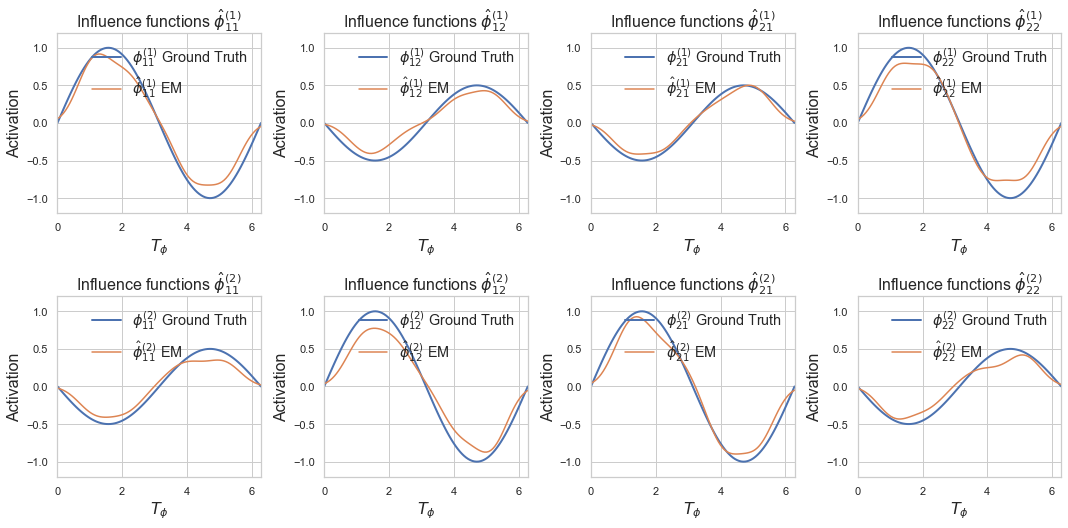

In [76]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),kernel[z][i][j]*np.sin(np.linspace(0,T_phi,100)),\
                     linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            axs.plot(np.linspace(0,T_phi,100),sine_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_em),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ EM'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,T_phi)
            plt.ylim(-1.2,1.2)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

We use mean-field to perform inference and visualize the estimated influence functions. 

In [79]:
%%time
alpha_estimated_mf,mean_W_estimated_mf,cov_W_estimated_mf,dir_alpha_estimated_mf,logl_list_mf,logl_test_list_mf\
=sine_model.MF_inference(points_hawkes,states,states_n,points_hawkes,states,states_n,\
                     T=T,T_test=T,b=0.2,eta=1.0,num_gq=5000,num_gq_test=5000,num_iter=1500)

100%|███████████████████████████████████████| 1500/1500 [10:51<00:00,  2.30it/s]

CPU times: user 44min 45s, sys: 13min 45s, total: 58min 31s
Wall time: 14min 24s


In [80]:
W_estimated_list_mf=np.zeros((100,number_of_states,number_of_dimensions,number_of_dimensions*number_of_basis+1))
for i in range(100):
    for z in range(number_of_states):
        for d in range(number_of_dimensions):
            W_estimated_list_mf[i][z][d]=multivariate_normal(mean_W_estimated_mf[z][d],cov_W_estimated_mf[z][d]).rvs()

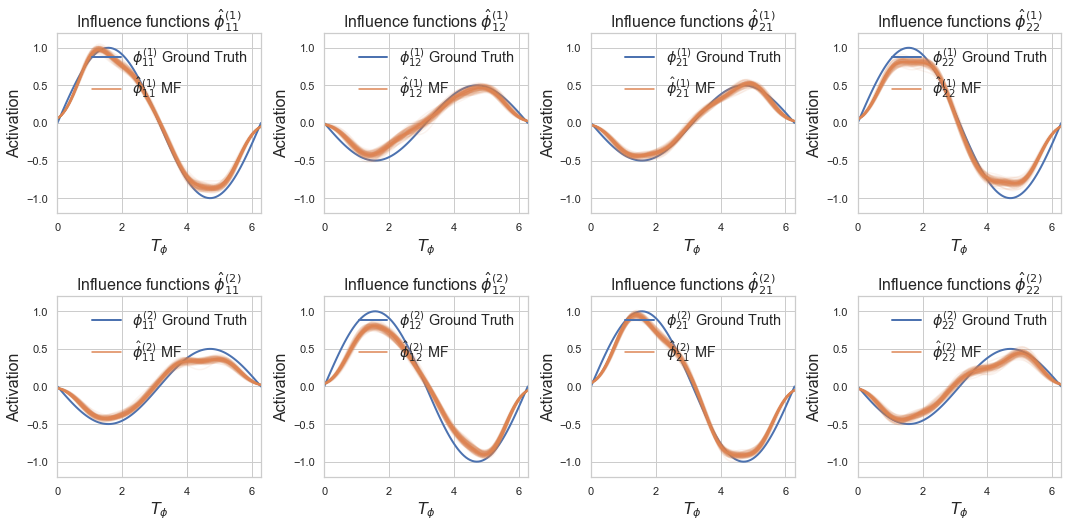

In [81]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),kernel[z][i][j]*np.sin(np.linspace(0,T_phi,100)),\
                     linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            for k in range(100):
                axs.plot(np.linspace(0,T_phi,100),sine_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_list_mf[k]),color=sns.color_palette()[1],alpha=0.09)
            axs.plot(np.linspace(0,T_phi,100),sine_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),mean_W_estimated_mf),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ MF'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,T_phi)
            plt.ylim(-1.2,1.2)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

### Influence Function Recovery: exponential decay sinsoidal kernel

In [82]:
with open('./2D_data_exponential_kernel.pickle', 'rb') as handle:
    points_hawkes,states,states_n = pickle.load(handle)

In [84]:
number_of_states=2
number_of_dimensions=2
number_of_basis=9
expo_model = FSHawkesBeta(number_of_states,number_of_dimensions,number_of_basis)
T_phi=2*np.pi
T=1000.

In [85]:
beta_ab=np.array([[20,20,-2.5],[20,20,-2.],[20,20,-1.5],[20,20,-1.],[20,20,-0.5],[20,20,0.],[20,20,0.5],[20,20,1.],[20,20,1.5]])
expo_model.set_hawkes_hyperparameters(beta_ab, T_phi)

In [86]:
%%time
lamda_ub_estimated_em,W_estimated_em,P_estimated_em,logl_list_em,logl_test_list_em\
=expo_model.EM_inference(points_hawkes,states,states_n,points_hawkes,states,states_n,\
                     T=T,T_test=T,b=0.2,num_gq=5000,num_gq_test=5000,num_iter=800)

100%|█████████████████████████████████████████| 800/800 [05:04<00:00,  2.63it/s]

CPU times: user 26min 12s, sys: 6min 37s, total: 32min 49s
Wall time: 11min 43s


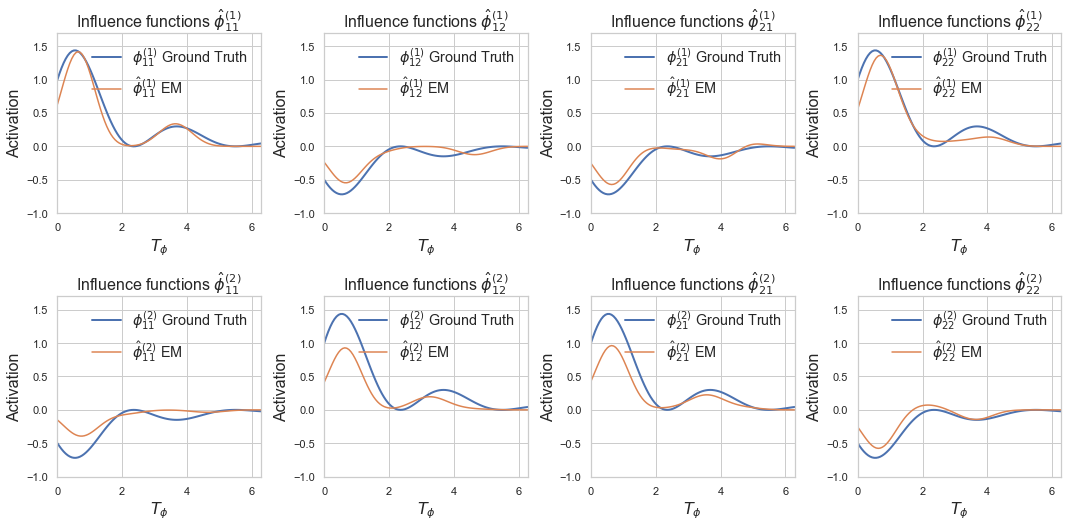

In [88]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),kernel[z][i][j]*np.exp(-0.5*np.linspace(0,T_phi,100))*(np.sin(2*np.linspace(0,T_phi,100))+1),\
                     linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            axs.plot(np.linspace(0,T_phi,100),expo_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_em),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ EM'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,T_phi)
            plt.ylim(-1.,1.7)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

In [92]:
%%time
alpha_estimated_mf,mean_W_estimated_mf,cov_W_estimated_mf,dir_alpha_estimated_mf,logl_list_mf,logl_test_list_mf\
=expo_model.MF_inference(points_hawkes,states,states_n,points_hawkes,states,states_n,\
                     T=T,T_test=T,b=0.2,eta=1.0,num_gq=5000,num_gq_test=5000,num_iter=3000)

100%|███████████████████████████████████████| 3000/3000 [25:32<00:00,  1.96it/s]

CPU times: user 1h 34min 1s, sys: 28min 24s, total: 2h 2min 26s
Wall time: 32min 13s


In [93]:
W_estimated_list_mf=np.zeros((100,number_of_states,number_of_dimensions,number_of_dimensions*number_of_basis+1))
for i in range(100):
    for z in range(number_of_states):
        for d in range(number_of_dimensions):
            W_estimated_list_mf[i][z][d]=multivariate_normal(mean_W_estimated_mf[z][d],cov_W_estimated_mf[z][d]).rvs()

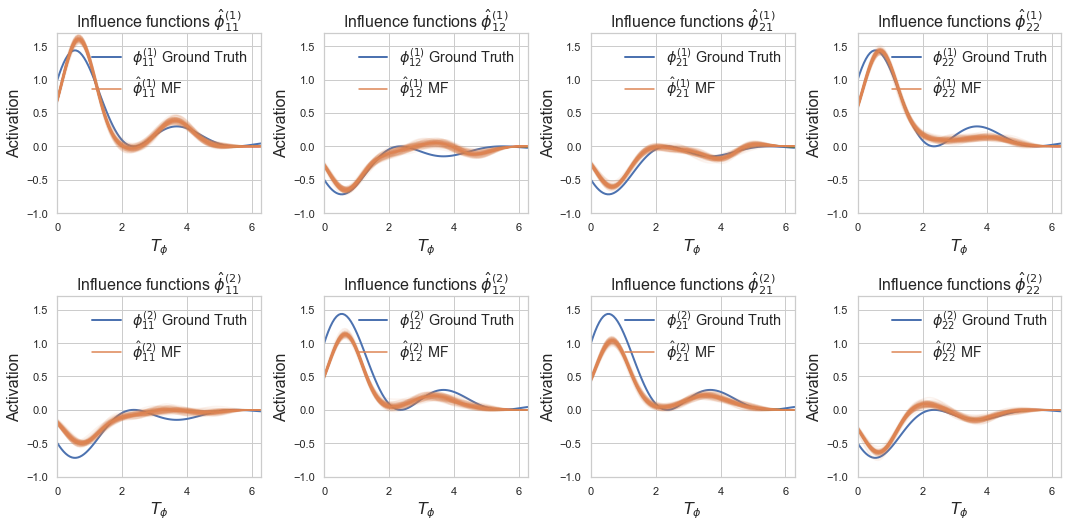

In [94]:
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),kernel[z][i][j]*np.exp(-0.5*np.linspace(0,T_phi,100))*(np.sin(2*np.linspace(0,T_phi,100))+1),\
                     linewidth=2,label='$\phi_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            for k in range(100):
                axs.plot(np.linspace(0,T_phi,100),expo_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_list_mf[k]),color=sns.color_palette()[1],alpha=0.09)
            axs.plot(np.linspace(0,T_phi,100),expo_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),mean_W_estimated_mf),color=sns.color_palette()[1],label='$\hat{\phi}_{%s%s}^{(%s)}$ MF'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_{\phi}$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,T_phi)
            plt.ylim(-1.,1.7)
            plt.title('Influence functions $\hat{\phi}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()